In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [313]:
df=pd.read_csv('C:\Users\Rezanick\Desktop\Projects\Springboard\Intermediate data science with python\Capstone Project\spam.csv')

In [314]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [315]:
print(df.columns)
print(df.index)

Index([u'v1', u'v2', u'Unnamed: 2', u'Unnamed: 3', u'Unnamed: 4'], dtype='object')
RangeIndex(start=0, stop=5572, step=1)


In [316]:
df=df[['v1','v2']]
df.columns=['Label','Text']

In [317]:
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [318]:
print(df.groupby('Label').count())

       Text
Label      
ham    4825
spam    747


In [319]:
df['Length']=df.loc[:,'Text'].apply(len)

In [320]:
df.head(10)

,Label,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154


In [321]:
df.groupby('Label').describe()

Length                                                         
        count        mean        std   min    25%    50%    75%    max
Label                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

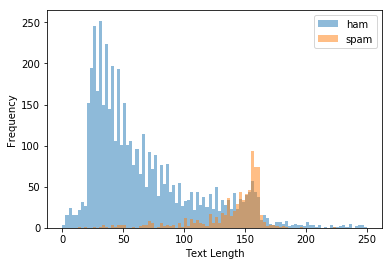

In [324]:
df['Length'][df['Label']=='ham'].plot(kind='hist', bins=100, range=[0,250], alpha=0.5, label='ham')
df['Length'][df['Label']=='spam'].plot(kind='hist', bins=100, range=[0,250], alpha=0.5, label='spam')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [334]:
counter = CountVectorizer(analyzer='word', stop_words = 'english', decode_error = 'ignore', max_features=5000)

In [ ]:
#Implement CountVectorizer to tokenize text messages 
#Tokens are stored in words variable
count=counter.fit(Text)
c=counter.transform(Text)
words=count.get_feature_names()

#c variable (vecotorized version of the text messages) is stored as sparse matrix. This object is converted to pandas df.

c2=pd.DataFrame(c.todense())
c2.head()

In [ ]:
c2=np.array(c2)
df_count=pd.DataFrame(c2.sum(axis=0))
df_count.index=words
df_count.columns=['Count']
df_count

In [330]:
sorted_word=df_count.sort_values(by='Count', ascending=False)
sorted_word.head()

,Count
ur,385
just,371
gt,318
lt,316
ok,292


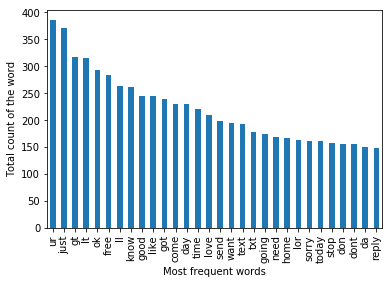

In [331]:
sorted_word['Count'][0:30].plot(kind='bar')
plt.xlabel('Most frequent words')
plt.ylabel('Total count of the word')
plt.show()

Below, we create the word frequency charts for spam/ham messages separately

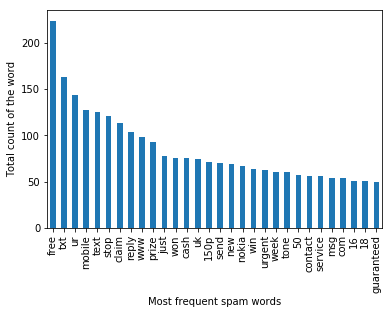

In [335]:
spam=df[df['Label']=='spam']
ham=df[df['Label']=='ham']

spam_msg=spam['Text']
spam_msg=spam_msg.tolist()

ham_msg=ham['Text']
ham_msg=ham_msg.tolist()

#Implement CountVectorizer to tokenize spam and ham messages 
#Tokens are stored in words variable
count=counter.fit(spam_msg)
c=counter.transform(spam_msg)
spam_words=count.get_feature_names()

#c variable (vecotorized version of the text messages) is stored as sparse matrix. This object is converted to pandas df.

c2=pd.DataFrame(c.todense())

c2=np.array(c2)
df_count=pd.DataFrame(c2.sum(axis=0))
df_count.index=spam_words
df_count.columns=['Count']
df_count

sorted_spam_word=df_count.sort_values(by='Count', ascending=False)
sorted_spam_word.head(10)

sorted_spam_word['Count'][0:30].plot(kind='bar')
plt.xlabel('Most frequent spam words')
plt.ylabel('Total count of the word')
plt.show()

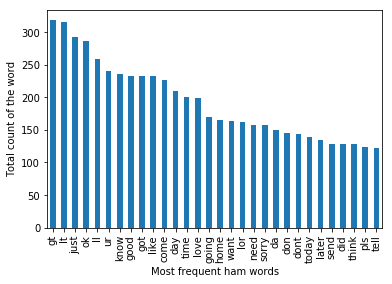

In [333]:
spam=df[df['Label']=='spam']
ham=df[df['Label']=='ham']

spam_msg=spam['Text']
spam_msg=spam_msg.tolist()

ham_msg=ham['Text']
ham_msg=ham_msg.tolist()

#Implement CountVectorizer to tokenize spam and ham messages 
#Tokens are stored in words variable
count=counter.fit(ham_msg)
c=counter.transform(ham_msg)
ham_words=count.get_feature_names()

#c variable (vecotorized version of the text messages) is stored as sparse matrix. This object is converted to pandas df.

c2=pd.DataFrame(c.todense())

c2=np.array(c2)
df_count=pd.DataFrame(c2.sum(axis=0))
df_count.index=ham_words
df_count.columns=['Count']
df_count

sorted_ham_word=df_count.sort_values(by='Count', ascending=False)
sorted_ham_word.head(10)

sorted_ham_word['Count'][0:30].plot(kind='bar')
plt.xlabel('Most frequent ham words')
plt.ylabel('Total count of the word')
plt.show()